In [1]:
import pandas as pd
import numpy as np

import decoupler as dc
import matplotlib.pyplot as plt

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [7]:
!wget 'https://zenodo.org/record/7035528/files/knockTF_expr.csv?download=1' -O /Users/smuellerdott/Documents/NTNUdecoupleR/data/knockTF_expr.csv
!wget 'https://zenodo.org/record/7035528/files/knockTF_meta.csv?download=1' -O /Users/smuellerdott/Documents/NTNUdecoupleR/data/knockTF_meta.csv

--2022-10-04 11:48:29--  https://zenodo.org/record/7035528/files/knockTF_expr.csv?download=1
Resolving zenodo.org (zenodo.org)... 188.184.117.155
Connecting to zenodo.org (zenodo.org)|188.184.117.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 146086808 (139M) [text/plain]
Saving to: ‘/Users/smuellerdott/Documents/NTNUdecoupleR/data/knockTF_expr.csv’

/Users/smuellerdott 100%[===================>] 139,32M  28,0MB/s    in 5,7s    

2022-10-04 11:48:35 (24,4 MB/s) - ‘/Users/smuellerdott/Documents/NTNUdecoupleR/data/knockTF_expr.csv’ saved [146086808/146086808]

--2022-10-04 11:48:36--  https://zenodo.org/record/7035528/files/knockTF_meta.csv?download=1
Resolving zenodo.org (zenodo.org)... 188.184.117.155
Connecting to zenodo.org (zenodo.org)|188.184.117.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 144861 (141K) [text/plain]
Saving to: ‘/Users/smuellerdott/Documents/NTNUdecoupleR/data/knockTF_meta.csv’

/Users/smuellerdott 100

In [2]:
mat = pd.read_csv('/Users/smuellerdott/Documents/NTNUdecoupleR/data/knockTF_expr.csv', index_col=0)
obs = pd.read_csv('/Users/smuellerdott/Documents/NTNUdecoupleR/data/knockTF_meta.csv', index_col=0)

In [10]:
mat

,A1BG,A1BG-AS1,A1CF,A2LD1,A2M,A2ML1,A4GALT,A4GNT,AA06,AAA1,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22
DataSet_01_001,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.00000,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,-0.033220,-0.046900,-0.143830,0.00000
DataSet_01_002,-0.173750,0.000000,-0.537790,-0.4424,-1.596640,-0.00010,-0.08260,-3.64590,0.0,0.0,...,0.000000,0.39579,0.000000,0.086110,0.28574,-0.130210,-0.276640,-0.881580,0.812950,0.47896
DataSet_01_003,-0.216130,0.000000,-0.220270,-0.0008,0.000000,0.15580,-0.35802,-0.32025,0.0,0.0,...,0.000000,-0.82964,0.000000,0.064470,0.59323,0.313950,-0.232600,0.065510,-0.147140,0.00000
DataSet_01_004,-0.255680,0.111050,-0.285270,0.0000,-0.035860,-0.46970,0.18559,-0.25601,0.0,0.0,...,0.000000,-0.39888,0.000000,0.104440,-0.16434,0.191460,0.415610,0.393840,0.127900,0.00000
DataSet_01_005,0.478500,-0.375710,-0.847180,0.0000,3.354450,0.17104,-0.34852,-0.95517,0.0,0.0,...,0.000000,0.24849,0.000000,-0.286920,-0.01815,0.119410,0.077850,0.234740,0.228690,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DataSet_04_039,0.668721,0.000000,0.120893,0.0000,0.263564,0.00000,0.00000,0.00000,0.0,0.0,...,-0.324808,0.00000,-0.370491,0.092874,0.00000,0.014075,-0.215169,0.141374,-0.076054,0.00000
DataSet_04_040,1.816027,0.000000,0.139721,0.0000,0.459498,0.00000,0.00000,0.00000,0.0,0.0,...,-0.321726,0.00000,-0.144934,-0.238343,0.00000,-0.134995,0.577406,0.082028,-0.171424,0.00000
DataSet_04_041,-0.174250,0.000000,-0.084499,0.0000,0.112492,0.00000,0.00000,0.00000,0.0,0.0,...,0.405369,0.00000,0.272526,-0.125475,0.00000,0.019763,-0.098584,0.072675,0.199813,0.00000
DataSet_04_042,0.976681,0.000000,0.099845,0.0000,0.366973,0.00000,0.00000,0.00000,0.0,0.0,...,0.397698,0.00000,-0.398350,0.037134,0.00000,0.409704,-0.056978,0.308122,-0.058794,0.00000


In [11]:
obs

,TF,Species,Knock.Method,Biosample.Name,Profile.ID,Platform,TF.Class,TF.Superclass,Tissue.Type,Biosample.Type,Data.Source,Pubmed.ID,logFC
DataSet_01_001,ESR1,Homo sapiens,siRNA,MCF7,GSE10061,GPL3921,Nuclear receptors with C4 zinc fingers,Zinc-coordinating DNA-binding domains,Mammary_gland,Cell line,GEO,18631401,-0.713850
DataSet_01_002,HNF1A,Homo sapiens,shRNA,HuH7,GSE103128,GPL18180,Homeo domain factors,Helix-turn-helix domains,Liver,Cell line,GEO,29466992,0.164280
DataSet_01_003,MLXIP,Homo sapiens,shRNA,HA1ER,GSE11242,GPL4133,Basic helix-loop-helix factors (bHLH),Basic domains,Embryo_kidney,Stem cell,GEO,18458340,0.262150
DataSet_01_004,CREB1,Homo sapiens,shRNA,K562,GSE12056,GPL570,Basic leucine zipper factors (bZIP),Basic domains,Haematopoietic_and_lymphoid_tissue,Cell line,GEO,18801183,-0.950180
DataSet_01_005,POU5F1,Homo sapiens,siRNA,GBS6,GSE12320,GPL570,Homeo domain factors,Helix-turn-helix domains,Bone_marrow,Cell line,GEO,20203285,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
DataSet_04_039,SRPK2,Homo sapiens,CRISPR,HepG2,ENCSR929EIP,-,Others,ENCODE_TF,Liver,Cell line,ENCODE,22955616,-1.392551
DataSet_04_040,WRN,Homo sapiens,shRNA,HepG2,ENCSR093FHC,-,Others,ENCODE_TF,Liver,Cell line,ENCODE,22955616,-0.173964
DataSet_04_041,YBX1,Homo sapiens,CRISPR,HepG2,ENCSR548OTL,-,Cold-shock domain factors,beta-Barrel DNA-binding domains,Liver,Cell line,ENCODE,22955616,-2.025170
DataSet_04_042,ZC3H8,Homo sapiens,shRNA,HepG2,ENCSR184YDW,-,C3H zinc finger factors,Zinc-coordinating DNA-binding domains,Liver,Cell line,ENCODE,22955616,-0.027152


In [3]:
msk = obs['logFC'] < -1
mat = mat[msk]
obs = obs[msk]
mat.shape, obs.shape

((388, 21985), (388, 13))

In [4]:
doro_ABC = dc.get_dorothea(levels=['A', 'B', 'C'])
collecTRI_signed = pd.read_csv('/Users/smuellerdott/Documents/NTNUdecoupleR/output/040722/final_dbTF/signed_collecTRI.csv')
collecTRI_agnostic = pd.read_csv('/Users/smuellerdott/Documents/NTNUdecoupleR/output/040722/final_dbTF/agnostic_collecTRI.csv')
collecTRI_rand = dc.shuffle_net(collecTRI_signed, target='target', weight='weight').drop_duplicates(['source', 'target'])

/Users/smuellerdott/miniconda3/envs/decoupler/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
# Build dictionary of networks to test
nets = {
    'ABC': doro_ABC,
    'signed': collecTRI_signed,
    'agnostic': collecTRI_agnostic,
    'rand': collecTRI_rand
}

# Example extra arguments
decouple_kws = {
    'ABC': {'args' : {'wsum' : {'times': 100}}},
    'signed': {'args' : {'wsum' : {'times': 100}}},
    'agnostic': {'args' : {'wsum' : {'times': 100}}},
    'rand': {'args' : {'wsum' : {'times': 100}}}

}

# Run benchmark pipeline
df = dc.benchmark(mat, obs, nets, perturb='TF', sign=-1, verbose=True, decouple_kws=decouple_kws)

Using ABC network...
Extracting inputs...
Formating net...
174 experiments without sources in net, they will be removed.
Running methods...
55 features of mat are empty, they will be removed.
Running mlm on mat with 214 samples and 21930 targets for 297 sources.


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.74it/s]


55 features of mat are empty, they will be removed.
Running ulm on mat with 214 samples and 21930 targets for 297 sources.
55 features of mat are empty, they will be removed.
Running wsum on mat with 214 samples and 21930 targets for 297 sources.
Infering activities on 1 batches.


100%|█████████████████████████████████████████████| 1/1 [00:03<00:00,  3.92s/it]


Calculating metrics...
Computing metrics...
Done.
Using signed network...
Extracting inputs...
Formating net...
139 experiments without sources in net, they will be removed.
Running methods...
52 features of mat are empty, they will be removed.
Running mlm on mat with 249 samples and 21933 targets for 598 sources.


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.17s/it]


52 features of mat are empty, they will be removed.
Running ulm on mat with 249 samples and 21933 targets for 598 sources.
52 features of mat are empty, they will be removed.
Running wsum on mat with 249 samples and 21933 targets for 598 sources.
Infering activities on 1 batches.


100%|█████████████████████████████████████████████| 1/1 [00:07<00:00,  7.45s/it]


Calculating metrics...
Computing metrics...
Done.
Using agnostic network...
Extracting inputs...
Formating net...
139 experiments without sources in net, they will be removed.
Running methods...
52 features of mat are empty, they will be removed.
Running mlm on mat with 249 samples and 21933 targets for 598 sources.


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.22s/it]


52 features of mat are empty, they will be removed.
Running ulm on mat with 249 samples and 21933 targets for 598 sources.
52 features of mat are empty, they will be removed.
Running wsum on mat with 249 samples and 21933 targets for 598 sources.
Infering activities on 1 batches.


100%|█████████████████████████████████████████████| 1/1 [00:06<00:00,  6.66s/it]


Calculating metrics...
Computing metrics...
Done.
Using rand network...
Extracting inputs...
Formating net...
139 experiments without sources in net, they will be removed.
Running methods...
52 features of mat are empty, they will be removed.
Running mlm on mat with 249 samples and 21933 targets for 597 sources.


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.00s/it]


52 features of mat are empty, they will be removed.
Running ulm on mat with 249 samples and 21933 targets for 597 sources.
52 features of mat are empty, they will be removed.
Running wsum on mat with 249 samples and 21933 targets for 597 sources.
Infering activities on 1 batches.


100%|█████████████████████████████████████████████| 1/1 [00:06<00:00,  6.73s/it]


Calculating metrics...
Computing metrics...
Done.


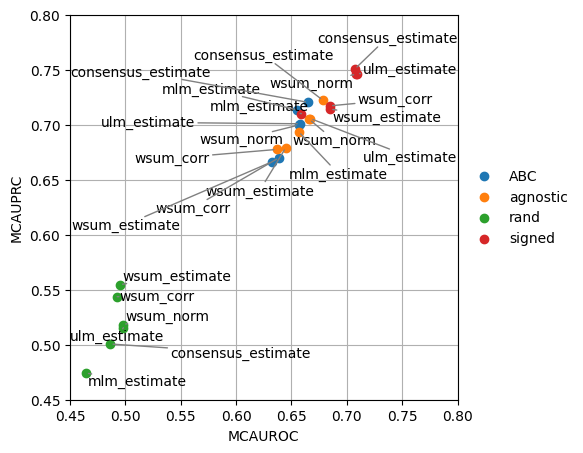

In [14]:
dc.plot_metrics_scatter(df, groupby='net', x='mcauroc', y='mcauprc')

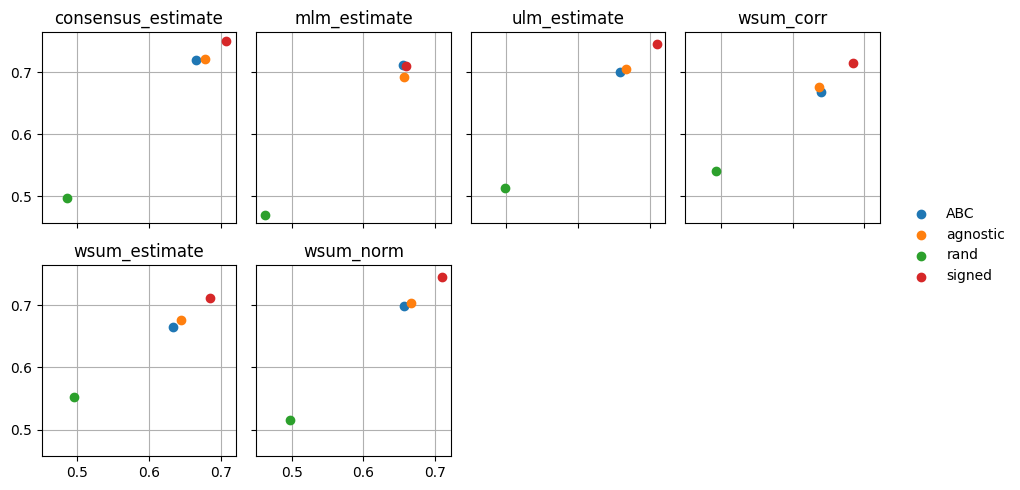

In [17]:
dc.plot_metrics_scatter_cols(df, col='method', figsize=(9, 5), groupby='net')
plt.savefig('../figures/performance_collecTRI.pdf')  

In [9]:
# Test weights
collecTRI_signed_weighted_res = pd.read_csv('/Users/smuellerdott/Documents/NTNUdecoupleR/output/040722/final_dbTF/signed_weighted_res_collecTRI.csv')
collecTRI_agnostic_res = pd.read_csv('/Users/smuellerdott/Documents/NTNUdecoupleR/output/040722/final_dbTF/agnostic_res_collecTRI.csv')
collecTRI_signed_res = pd.read_csv('/Users/smuellerdott/Documents/NTNUdecoupleR/output/040722/final_dbTF/signed_res_collecTRI.csv')
collecTRI_weighted_res = pd.read_csv('/Users/smuellerdott/Documents/NTNUdecoupleR/output/040722/final_dbTF/weighted_res_collecTRI.csv')
collecTRI_rand_res = dc.shuffle_net(collecTRI_signed_res, target='target', weight='weight').drop_duplicates(['source', 'target'])

In [10]:
# Build dictionary of networks to test
nets_res = {
    'ABC': doro_ABC,
    'signed': collecTRI_signed_res,
    'agnostic': collecTRI_agnostic_res,
    'weighted': collecTRI_weighted_res,
    'signed_weighted': collecTRI_signed_weighted_res,
    'rand': collecTRI_rand_res
}

# Example extra arguments
decouple_kws_res = {
    'ABC': {'args' : {'wsum' : {'times': 100}}},
    'signed': {'args' : {'wsum' : {'times': 100}}},
    'agnostic': {'args' : {'wsum' : {'times': 100}}},
    'weighted': {'args' : {'wsum' : {'times': 100}}},
    'signed_weighted': {'args' : {'wsum' : {'times': 100}}},
    'rand': {'args' : {'wsum' : {'times': 100}}}

}

# Run benchmark pipeline
df_res = dc.benchmark(mat, obs, nets_res, perturb='TF', sign=-1, verbose=True, decouple_kws=decouple_kws_res)

Using ABC network...
Extracting inputs...
Formating net...
174 experiments without sources in net, they will be removed.
Running methods...
55 features of mat are empty, they will be removed.
Running mlm on mat with 214 samples and 21930 targets for 297 sources.


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.70it/s]


55 features of mat are empty, they will be removed.
Running ulm on mat with 214 samples and 21930 targets for 297 sources.
55 features of mat are empty, they will be removed.
Running wsum on mat with 214 samples and 21930 targets for 297 sources.
Infering activities on 1 batches.


100%|█████████████████████████████████████████████| 1/1 [00:03<00:00,  3.01s/it]


Calculating metrics...
Computing metrics...
Done.
Using signed network...
Extracting inputs...
Formating net...
149 experiments without sources in net, they will be removed.
Running methods...
52 features of mat are empty, they will be removed.
Running mlm on mat with 239 samples and 21933 targets for 497 sources.


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.22it/s]


52 features of mat are empty, they will be removed.
Running ulm on mat with 239 samples and 21933 targets for 497 sources.
52 features of mat are empty, they will be removed.
Running wsum on mat with 239 samples and 21933 targets for 497 sources.
Infering activities on 1 batches.


100%|█████████████████████████████████████████████| 1/1 [00:05<00:00,  5.03s/it]


Calculating metrics...
Computing metrics...
Done.
Using agnostic network...
Extracting inputs...
Formating net...
149 experiments without sources in net, they will be removed.
Running methods...
52 features of mat are empty, they will be removed.
Running mlm on mat with 239 samples and 21933 targets for 497 sources.


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.25it/s]


52 features of mat are empty, they will be removed.
Running ulm on mat with 239 samples and 21933 targets for 497 sources.
52 features of mat are empty, they will be removed.
Running wsum on mat with 239 samples and 21933 targets for 497 sources.
Infering activities on 1 batches.


100%|█████████████████████████████████████████████| 1/1 [00:05<00:00,  5.03s/it]


Calculating metrics...
Computing metrics...
Done.
Using weighted network...
Extracting inputs...
Formating net...
149 experiments without sources in net, they will be removed.
Running methods...
52 features of mat are empty, they will be removed.
Running mlm on mat with 239 samples and 21933 targets for 497 sources.


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.24it/s]


52 features of mat are empty, they will be removed.
Running ulm on mat with 239 samples and 21933 targets for 497 sources.
52 features of mat are empty, they will be removed.
Running wsum on mat with 239 samples and 21933 targets for 497 sources.
Infering activities on 1 batches.


100%|█████████████████████████████████████████████| 1/1 [00:05<00:00,  5.99s/it]


Calculating metrics...
Computing metrics...
Done.
Using signed_weighted network...
Extracting inputs...
Formating net...
149 experiments without sources in net, they will be removed.
Running methods...
52 features of mat are empty, they will be removed.
Running mlm on mat with 239 samples and 21933 targets for 497 sources.


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.25it/s]


52 features of mat are empty, they will be removed.
Running ulm on mat with 239 samples and 21933 targets for 497 sources.
52 features of mat are empty, they will be removed.
Running wsum on mat with 239 samples and 21933 targets for 497 sources.
Infering activities on 1 batches.


100%|█████████████████████████████████████████████| 1/1 [00:05<00:00,  5.09s/it]


Calculating metrics...
Computing metrics...
Done.
Using rand network...
Extracting inputs...
Formating net...
149 experiments without sources in net, they will be removed.
Running methods...
52 features of mat are empty, they will be removed.
Running mlm on mat with 239 samples and 21933 targets for 495 sources.


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.24it/s]


52 features of mat are empty, they will be removed.
Running ulm on mat with 239 samples and 21933 targets for 495 sources.
52 features of mat are empty, they will be removed.
Running wsum on mat with 239 samples and 21933 targets for 495 sources.
Infering activities on 1 batches.


100%|█████████████████████████████████████████████| 1/1 [00:04<00:00,  4.90s/it]


Calculating metrics...
Computing metrics...
Done.


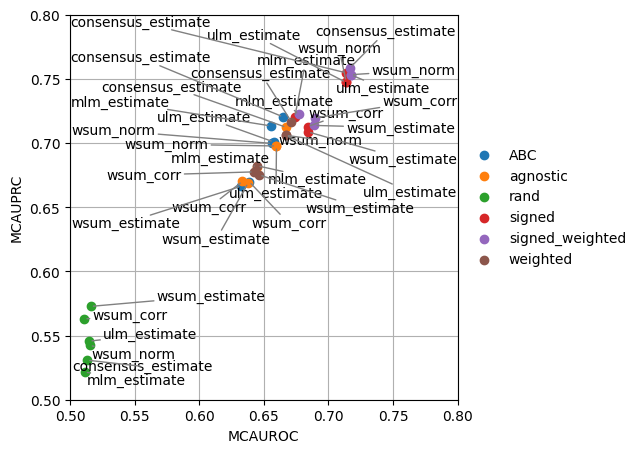

In [11]:
dc.plot_metrics_scatter(df_res, groupby='net', x='mcauroc', y='mcauprc')

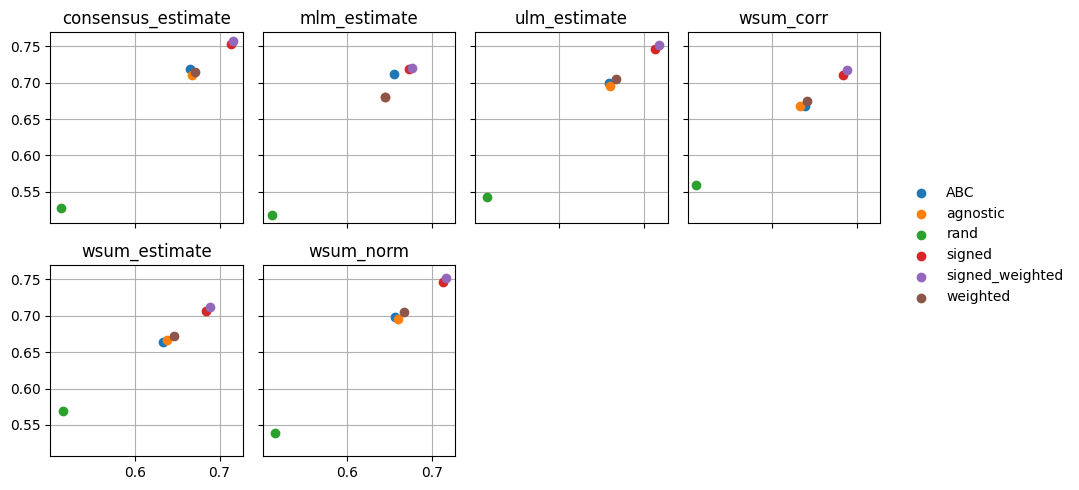

In [12]:
dc.plot_metrics_scatter_cols(df_res, col='method', figsize=(9, 5), groupby='net')

In [ ]:
plt.savefig('../figures/performance_weights.pdf') 

In [46]:
# Test all TFs
collecTRI_signed_all = pd.read_csv('/Users/smuellerdott/Documents/NTNUdecoupleR/output/040722/final_allTF/signed_collecTRI.csv')
collecTRI_agnostic_all = pd.read_csv('/Users/smuellerdott/Documents/NTNUdecoupleR/output/040722/final_allTF/agnostic_collecTRI.csv')
collecTRI_rand_all = dc.shuffle_net(collecTRI_signed_all, target='target', weight='weight').drop_duplicates(['source', 'target'])

In [51]:
# Build dictionary of networks to test
nets_all = {
    'ABC': doro_ABC,
    'signed': collecTRI_signed,
    'signed_all': collecTRI_signed_all,
    'agnostic_all': collecTRI_agnostic_all,
    'rand_all': collecTRI_rand_all
}

# Example extra arguments
decouple_kws_all = {
    'ABC': {'args' : {'wsum' : {'times': 100}}},
    'signed': {'args' : {'wsum' : {'times': 100}}},
    'signed_all': {'args' : {'wsum' : {'times': 100}}},
    'agnostic_all': {'args' : {'wsum' : {'times': 100}}},
    'rand_all': {'args' : {'wsum' : {'times': 100}}}

}

# Run benchmark pipeline
df_all = dc.benchmark(mat, obs, nets_all, perturb='TF', sign=-1, verbose=True, decouple_kws=decouple_kws_all)

Using ABC network...
Extracting inputs...
Formating net...
174 experiments without sources in net, they will be removed.
Running methods...
55 features of mat are empty, they will be removed.
Running mlm on mat with 214 samples and 21930 targets for 297 sources.


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.82it/s]


55 features of mat are empty, they will be removed.
Running ulm on mat with 214 samples and 21930 targets for 297 sources.
55 features of mat are empty, they will be removed.
Running wsum on mat with 214 samples and 21930 targets for 297 sources.
Infering activities on 1 batches.


100%|█████████████████████████████████████████████| 1/1 [00:03<00:00,  3.15s/it]


Calculating metrics...
Computing metrics...
Done.
Using signed network...
Extracting inputs...
Formating net...
139 experiments without sources in net, they will be removed.
Running methods...
52 features of mat are empty, they will be removed.
Running mlm on mat with 249 samples and 21933 targets for 598 sources.


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.02it/s]


52 features of mat are empty, they will be removed.
Running ulm on mat with 249 samples and 21933 targets for 598 sources.
52 features of mat are empty, they will be removed.
Running wsum on mat with 249 samples and 21933 targets for 598 sources.
Infering activities on 1 batches.


100%|█████████████████████████████████████████████| 1/1 [00:05<00:00,  5.91s/it]


Calculating metrics...
Computing metrics...
Done.
Using signed_all network...
Extracting inputs...
Formating net...
109 experiments without sources in net, they will be removed.
Running methods...
52 features of mat are empty, they will be removed.
Running mlm on mat with 279 samples and 21933 targets for 784 sources.


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.31s/it]


52 features of mat are empty, they will be removed.
Running ulm on mat with 279 samples and 21933 targets for 784 sources.
52 features of mat are empty, they will be removed.
Running wsum on mat with 279 samples and 21933 targets for 784 sources.
Infering activities on 1 batches.


100%|█████████████████████████████████████████████| 1/1 [00:07<00:00,  7.66s/it]


Calculating metrics...
Computing metrics...
Done.
Using agnostic_all network...
Extracting inputs...
Formating net...
109 experiments without sources in net, they will be removed.
Running methods...
52 features of mat are empty, they will be removed.
Running mlm on mat with 279 samples and 21933 targets for 784 sources.


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.28s/it]


52 features of mat are empty, they will be removed.
Running ulm on mat with 279 samples and 21933 targets for 784 sources.
52 features of mat are empty, they will be removed.
Running wsum on mat with 279 samples and 21933 targets for 784 sources.
Infering activities on 1 batches.


100%|█████████████████████████████████████████████| 1/1 [00:07<00:00,  7.41s/it]


Calculating metrics...
Computing metrics...
Done.
Using rand_all network...
Extracting inputs...
Formating net...
109 experiments without sources in net, they will be removed.
Running methods...
52 features of mat are empty, they will be removed.
Running mlm on mat with 279 samples and 21933 targets for 788 sources.


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.31s/it]


52 features of mat are empty, they will be removed.
Running ulm on mat with 279 samples and 21933 targets for 788 sources.
52 features of mat are empty, they will be removed.
Running wsum on mat with 279 samples and 21933 targets for 788 sources.
Infering activities on 1 batches.


100%|█████████████████████████████████████████████| 1/1 [00:07<00:00,  7.88s/it]


Calculating metrics...
Computing metrics...
Done.


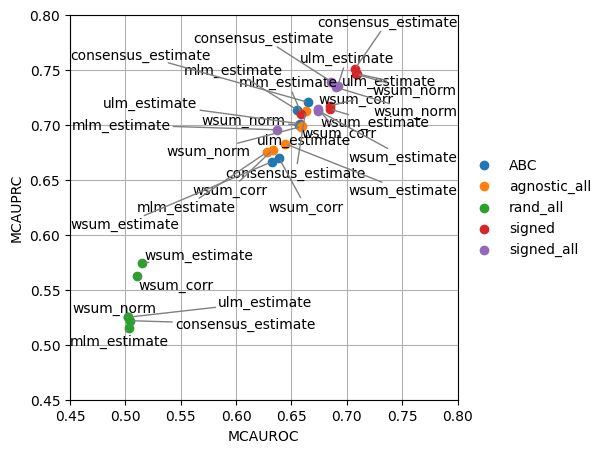

In [52]:
dc.plot_metrics_scatter(df_all, groupby='net', x='mcauroc', y='mcauprc')

In [8]:
collecTRI_signed = pd.read_csv('/Users/smuellerdott/Documents/NTNUdecoupleR/output/040722/final_dbTF/signed_collecTRI.csv')
collecTRI_10_random = pd.read_csv('/Users/smuellerdott/Documents/NTNUdecoupleR/output/040722/filter_dbTF/collecTRI_10%_random.csv')
collecTRI_20_random = pd.read_csv('/Users/smuellerdott/Documents/NTNUdecoupleR/output/040722/filter_dbTF/collecTRI_20%_random.csv')
collecTRI_30_random = pd.read_csv('/Users/smuellerdott/Documents/NTNUdecoupleR/output/040722/filter_dbTF/collecTRI_30%_random.csv')
collecTRI_40_random = pd.read_csv('/Users/smuellerdott/Documents/NTNUdecoupleR/output/040722/filter_dbTF/collecTRI_40%_random.csv')
collecTRI_50_random = pd.read_csv('/Users/smuellerdott/Documents/NTNUdecoupleR/output/040722/filter_dbTF/collecTRI_50%_random.csv')
collecTRI_10 = pd.read_csv('/Users/smuellerdott/Documents/NTNUdecoupleR/output/040722/filter_dbTF/collecTRI_10%.csv')
collecTRI_20 = pd.read_csv('/Users/smuellerdott/Documents/NTNUdecoupleR/output/040722/filter_dbTF/collecTRI_20%.csv')
collecTRI_30 = pd.read_csv('/Users/smuellerdott/Documents/NTNUdecoupleR/output/040722/filter_dbTF/collecTRI_30%.csv')
collecTRI_40 = pd.read_csv('/Users/smuellerdott/Documents/NTNUdecoupleR/output/040722/filter_dbTF/collecTRI_40%.csv')
collecTRI_50 = pd.read_csv('/Users/smuellerdott/Documents/NTNUdecoupleR/output/040722/filter_dbTF/collecTRI_50%.csv')


In [9]:

# Build dictionary of networks to test
nets_filtered = {
    'collecTRI': collecTRI_signed,
    '10': collecTRI_10,
    '20': collecTRI_20,
    '30': collecTRI_30,
    '40': collecTRI_40,
    '50': collecTRI_50
}

nets_filtered_random = {
    'collecTRI': collecTRI_signed,
    '10_random': collecTRI_10_random,
    '20_random': collecTRI_20_random,
    '30_random': collecTRI_30_random,
    '40_random': collecTRI_40_random,
    '50_random': collecTRI_50_random
}

# Example extra arguments
decouple_kws_filtered = {
    'collecTRI': {'args' : {'wsum' : {'times': 100}}},
    '10': {'args' : {'wsum' : {'times': 100}}},
    '20': {'args' : {'wsum' : {'times': 100}}},
    '30': {'args' : {'wsum' : {'times': 100}}},
    '40': {'args' : {'wsum' : {'times': 100}}},
    '50': {'args' : {'wsum' : {'times': 100}}}

}

decouple_kws_filtered_random = {
    'collecTRI': {'args' : {'wsum' : {'times': 100}}},
    '10_random': {'args' : {'wsum' : {'times': 100}}},
    '20_random': {'args' : {'wsum' : {'times': 100}}},
    '30_random': {'args' : {'wsum' : {'times': 100}}},
    '40_random': {'args' : {'wsum' : {'times': 100}}},
    '50_random': {'args' : {'wsum' : {'times': 100}}}

}

# Run benchmark pipeline
df_filtered = dc.benchmark(mat, obs, nets_filtered, perturb='TF', sign=-1, verbose=True, decouple_kws=decouple_kws_filtered)
df_filtered_random = dc.benchmark(mat, obs, nets_filtered_random, perturb='TF', sign=-1, verbose=True, decouple_kws=decouple_kws_filtered_random)

Using collecTRI network...
Extracting inputs...
Formating net...
139 experiments without sources in net, they will be removed.
Running methods...
52 features of mat are empty, they will be removed.
Running mlm on mat with 249 samples and 21933 targets for 598 sources.


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.27s/it]


52 features of mat are empty, they will be removed.
Running ulm on mat with 249 samples and 21933 targets for 598 sources.
52 features of mat are empty, they will be removed.
Running wsum on mat with 249 samples and 21933 targets for 598 sources.
Infering activities on 1 batches.


100%|█████████████████████████████████████████████| 1/1 [00:09<00:00,  9.42s/it]


Calculating metrics...
Computing metrics...
Done.
Using 10 network...
Extracting inputs...
Formating net...
155 experiments without sources in net, they will be removed.
Running methods...
52 features of mat are empty, they will be removed.
Running mlm on mat with 233 samples and 21933 targets for 458 sources.


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.17s/it]


52 features of mat are empty, they will be removed.
Running ulm on mat with 233 samples and 21933 targets for 458 sources.
52 features of mat are empty, they will be removed.
Running wsum on mat with 233 samples and 21933 targets for 458 sources.
Infering activities on 1 batches.


100%|█████████████████████████████████████████████| 1/1 [00:06<00:00,  6.69s/it]


Calculating metrics...
Computing metrics...
Done.
Using 20 network...
Extracting inputs...
Formating net...
161 experiments without sources in net, they will be removed.
Running methods...
52 features of mat are empty, they will be removed.
Running mlm on mat with 227 samples and 21933 targets for 426 sources.


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.18it/s]


52 features of mat are empty, they will be removed.
Running ulm on mat with 227 samples and 21933 targets for 426 sources.
52 features of mat are empty, they will be removed.
Running wsum on mat with 227 samples and 21933 targets for 426 sources.
Infering activities on 1 batches.


100%|█████████████████████████████████████████████| 1/1 [00:04<00:00,  4.35s/it]


Calculating metrics...
Computing metrics...
Done.
Using 30 network...
Extracting inputs...
Formating net...
168 experiments without sources in net, they will be removed.
Running methods...
52 features of mat are empty, they will be removed.
Running mlm on mat with 220 samples and 21933 targets for 398 sources.


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.48it/s]


52 features of mat are empty, they will be removed.
Running ulm on mat with 220 samples and 21933 targets for 398 sources.
52 features of mat are empty, they will be removed.
Running wsum on mat with 220 samples and 21933 targets for 398 sources.
Infering activities on 1 batches.


100%|█████████████████████████████████████████████| 1/1 [00:03<00:00,  3.87s/it]


Calculating metrics...
Computing metrics...
Done.
Using 40 network...
Extracting inputs...
Formating net...
176 experiments without sources in net, they will be removed.
Running methods...
52 features of mat are empty, they will be removed.
Running mlm on mat with 212 samples and 21933 targets for 369 sources.


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.61it/s]


52 features of mat are empty, they will be removed.
Running ulm on mat with 212 samples and 21933 targets for 369 sources.
52 features of mat are empty, they will be removed.
Running wsum on mat with 212 samples and 21933 targets for 369 sources.
Infering activities on 1 batches.


100%|█████████████████████████████████████████████| 1/1 [00:04<00:00,  4.10s/it]


Calculating metrics...
Computing metrics...
Done.
Using 50 network...
Extracting inputs...
Formating net...
183 experiments without sources in net, they will be removed.
Running methods...
55 features of mat are empty, they will be removed.
Running mlm on mat with 205 samples and 21930 targets for 332 sources.


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.84it/s]


55 features of mat are empty, they will be removed.
Running ulm on mat with 205 samples and 21930 targets for 332 sources.
55 features of mat are empty, they will be removed.
Running wsum on mat with 205 samples and 21930 targets for 332 sources.
Infering activities on 1 batches.


100%|█████████████████████████████████████████████| 1/1 [00:04<00:00,  4.23s/it]


Calculating metrics...
Computing metrics...
Done.
Using collecTRI network...
Extracting inputs...
Formating net...
139 experiments without sources in net, they will be removed.
Running methods...
52 features of mat are empty, they will be removed.
Running mlm on mat with 249 samples and 21933 targets for 598 sources.


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.11s/it]


52 features of mat are empty, they will be removed.
Running ulm on mat with 249 samples and 21933 targets for 598 sources.
52 features of mat are empty, they will be removed.
Running wsum on mat with 249 samples and 21933 targets for 598 sources.
Infering activities on 1 batches.


100%|█████████████████████████████████████████████| 1/1 [00:06<00:00,  6.24s/it]


Calculating metrics...
Computing metrics...
Done.
Using 10_random network...
Extracting inputs...
Formating net...
150 experiments without sources in net, they will be removed.
Running methods...
52 features of mat are empty, they will be removed.
Running mlm on mat with 238 samples and 21933 targets for 492 sources.


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.20it/s]


52 features of mat are empty, they will be removed.
Running ulm on mat with 238 samples and 21933 targets for 492 sources.
52 features of mat are empty, they will be removed.
Running wsum on mat with 238 samples and 21933 targets for 492 sources.
Infering activities on 1 batches.


100%|█████████████████████████████████████████████| 1/1 [00:05<00:00,  5.47s/it]


Calculating metrics...
Computing metrics...
Done.
Using 20_random network...
Extracting inputs...
Formating net...
151 experiments without sources in net, they will be removed.
Running methods...
52 features of mat are empty, they will be removed.
Running mlm on mat with 237 samples and 21933 targets for 475 sources.


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.28it/s]


52 features of mat are empty, they will be removed.
Running ulm on mat with 237 samples and 21933 targets for 475 sources.
52 features of mat are empty, they will be removed.
Running wsum on mat with 237 samples and 21933 targets for 475 sources.
Infering activities on 1 batches.


100%|█████████████████████████████████████████████| 1/1 [00:05<00:00,  5.33s/it]


Calculating metrics...
Computing metrics...
Done.
Using 30_random network...
Extracting inputs...
Formating net...
153 experiments without sources in net, they will be removed.
Running methods...
52 features of mat are empty, they will be removed.
Running mlm on mat with 235 samples and 21933 targets for 450 sources.


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.31it/s]


52 features of mat are empty, they will be removed.
Running ulm on mat with 235 samples and 21933 targets for 450 sources.
52 features of mat are empty, they will be removed.
Running wsum on mat with 235 samples and 21933 targets for 450 sources.
Infering activities on 1 batches.


100%|█████████████████████████████████████████████| 1/1 [00:04<00:00,  4.66s/it]


Calculating metrics...
Computing metrics...
Done.
Using 40_random network...
Extracting inputs...
Formating net...
164 experiments without sources in net, they will be removed.
Running methods...
52 features of mat are empty, they will be removed.
Running mlm on mat with 224 samples and 21933 targets for 439 sources.


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.40it/s]


52 features of mat are empty, they will be removed.
Running ulm on mat with 224 samples and 21933 targets for 439 sources.
52 features of mat are empty, they will be removed.
Running wsum on mat with 224 samples and 21933 targets for 439 sources.
Infering activities on 1 batches.


100%|█████████████████████████████████████████████| 1/1 [00:04<00:00,  4.60s/it]


Calculating metrics...
Computing metrics...
Done.
Using 50_random network...
Extracting inputs...
Formating net...
161 experiments without sources in net, they will be removed.
Running methods...
52 features of mat are empty, they will be removed.
Running mlm on mat with 227 samples and 21933 targets for 415 sources.


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.52it/s]


52 features of mat are empty, they will be removed.
Running ulm on mat with 227 samples and 21933 targets for 415 sources.
52 features of mat are empty, they will be removed.
Running wsum on mat with 227 samples and 21933 targets for 415 sources.
Infering activities on 1 batches.


100%|█████████████████████████████████████████████| 1/1 [00:04<00:00,  4.17s/it]


Calculating metrics...
Computing metrics...
Done.


In [9]:
dc.plot_metrics_scatter(df_filtered, groupby='net', x='mcauroc', y='mcauprc')

NameError: name 'df_filtered' is not defined

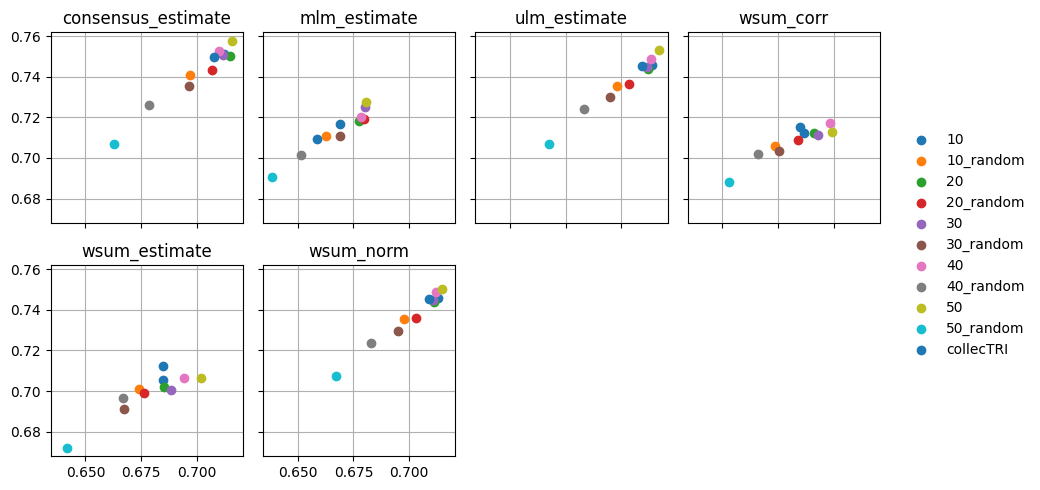

In [9]:
dc.plot_metrics_scatter_cols(df_filtered, col='method', figsize=(9, 5), groupby='net')

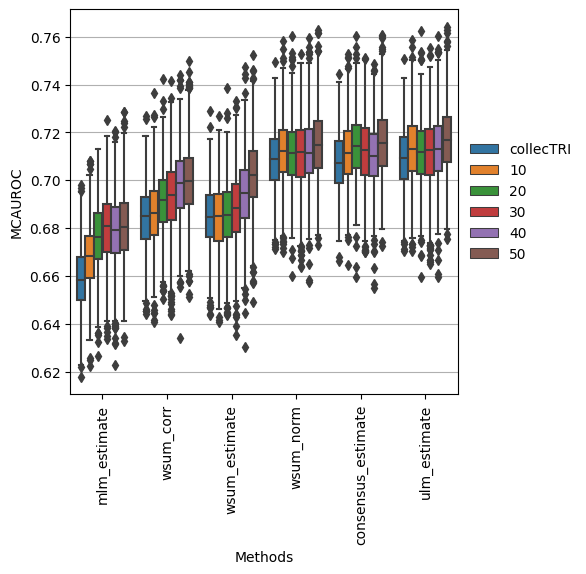

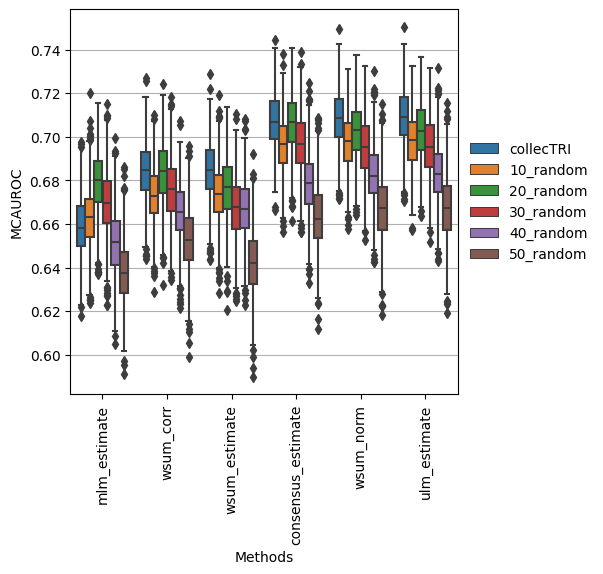

In [10]:
dc.plot_metrics_boxplot(df_filtered, metric='mcauroc', groupby='net')
dc.plot_metrics_boxplot(df_filtered_random, metric='mcauroc', groupby='net')

In [19]:
?dc.plot_metrics_boxplot

Signature:
dc.plot_metrics_boxplot(
    df,
    metric,
    groupby=None,
    figsize=(5, 5),
    dpi=100,
    ax=None,
    title=None,
    xlabel=None,
    ylabel=None,
    return_fig=False,
    save=None,
    **kwargs,
)
Docstring:
Plot boxplots showing the distribution of scores between methods for a metric.

Parameters
----------
df : DataFrame
    Performance metrics per method, obtained by running run_benchmark.
metric : str
    Name of metric to plot, must be either "mcauroc" or "mcauprc".
groupby : str
    Metrics can be gruped by an extra categorical column.
figsize : tuple
    Figure size.
dpi : int
    DPI resolution of figure.
ax : Axes, None
    A matplotlib axes object. If None returns new figure.
title : str
    Text to write as title of the plot.
xlabel : str
    Text to write as xlabel of the plot.
ylabel : str
    Text to write as ylabel of the plot.
return_fig : bool
    Whether to return a Figure object or not.
save : str, None
    Path to where to save the plot. In